# <center> Universidad Politécnica de Yucatán </center>
# <center> ![logoupy](https://static.wixstatic.com/media/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.png/v1/fill/w_560,h_394,al_c,q_85,usm_0.66_1.00_0.01/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.webp)
## <center> Supervise Learning </center>
<center><h2>Data 7A</h2></center>
<center><h2>Team:</h2></center>
<center><strong>
<li>Adrian Roberto Carmona Rodriguez</li>
<li>Alfredo Alexander Paz Martínez</li>
<li>Pedro Alejandro Uican díaz</li>
<li>Karla Patricia Valdez Echeverria</li>
<li>Emmanuel Alejandro Hurtado Alejandre</li>
</strong></center>

# Univariate Linear Regression

In this assignment, you will implement univariate linear regression to predict profits for a restaurant.

You are considering different cities for opening a new branch. The chain already has presence in different cities and you have data for profits and populations from these cities. You would like to use this data to help you predict the profits depending on the city population.

The file data.csv contains the dataset for the linear regression. The first column is the population (10,000's people) and the second column is the profit ($10,000's).

You should fit a linear regression model to the data using the two previous known methods and plot the data with the fitted line:
* Scikit-learn
* Normal equations

After that, you should implement the gradient descent algorithm to train a simple linear regression model. You should obtain parameter values similar (not necessarily exact) to the fitted models from previous two methods.

* Define a variable for the learning rate $\alpha$ and try with a default value of 0.01.
* Define a maximum number of iterations with 1500 as default.
* Initialize $\theta_0$ and $\theta_1$ with random values or zeros.
*  Plot J as a function of time (iterations)
* Plot in 3D the value of $J(\theta_0, \theta_1)$ as a function of the parameters.

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

### Plot data

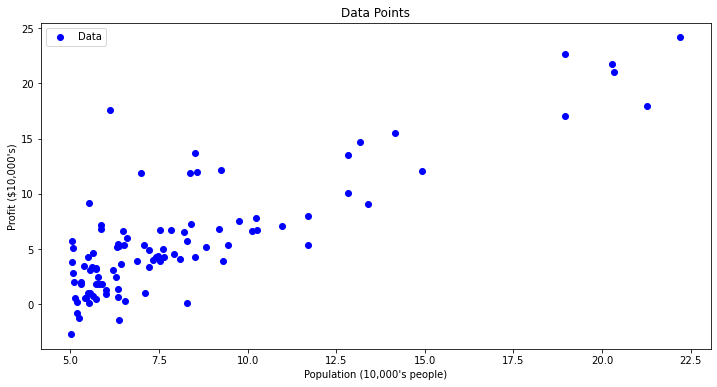

In [2]:
# Your code

# Data
df = pd.read_csv("data.csv", names= ["population","profit"] )
x = np.array(df['population'])
y = np.array(df['profit'])

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label="Data", color="blue")
plt.legend()
plt.xlabel("Population (10,000's people)")
plt.ylabel("Profit ($10,000's)")
plt.title("Data Points")
plt.show()

### Scikit-learn

In [3]:
# Your code

# Data for Scikit-learn
x_sl = np.array(df['population']).reshape(-1, 1)
y_sl = np.array(df['profit']).reshape(-1, 1)

# Training Model
lr = LinearRegression()
lr.fit(x_sl, y_sl)
print(lr.intercept_, lr.coef_)

[-3.89578088] [[1.19303364]]


$\hat{y} = -3.8957 + 1.1930 x$

### Normal equations

In [4]:
# Your code

# x_mean & y_mean
x_mean = np.mean(x)
y_mean = np.mean(y)

# Sxx & Sxy
Sxx = np.mean((x - x_mean)**2)
Sxy = np.mean(np.multiply(x - x_mean, y - y_mean))

# theta1
theta_1 = Sxy / Sxx

# theta0 
theta_0 = y_mean - (theta_1*x_mean)

# y_hat (as vector)
y_hat = theta_0 + theta_1*x

# Residuals vector
residuals = y - y_hat

print("With Normal Equatios")
print("θ0 is",theta_0)
print("θ1 is",theta_1)

With Normal Equatios
θ0 is -3.8957808783118537
θ1 is 1.193033644189594


### Plot Linear Regression with Normal Equations

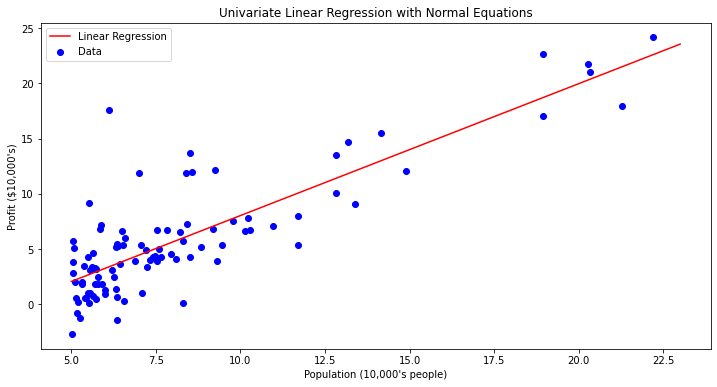

In [5]:
# Ploting Linear Regression

# y_hat (as a iterable function)
y_hat = lambda x: theta_0 + theta_1*x

def plot_results(y_hat, x, y):
    x_line = np.arange(5.0,23.5)    
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label="Data", color="blue")
    plt.plot(x_line,y_hat(x_line), color = "red", label="Linear Regression")
    plt.legend()
    plt.xlabel("Population (10,000's people)")
    plt.ylabel("Profit ($10,000's)")
    plt.title("Univariate Linear Regression with Normal Equations")
    plt.show()
    
# Show plot
plot_results(y_hat,x,y)

### Gradient

In [6]:
# Your code

# Cost Function
def coste(x, y, theta_0, theta_1):
    m = len(x)
    error = 0.0
    for i in range(m):
        hipotesis = theta_0+ theta_1 * x[i]
        error +=  (y[i] - hipotesis) ** 2
    return error / (2*m)

# Gradient Decent Function
def descenso_gradiente(x, y, theta_0, theta_1, alpha, epochs):
    m = len(x)
    historial_coste = []
    thetas_0 = []
    thetas_1=[]

    # Run Epoches (4000)
    for ep in range(epochs):
        theta_1_deriv = 0  # Initial Theta_0
        theta_0_deriv = 0  # Initial Theta_1
        
        # Calculate Partial Derivatives
        for i in range(m):
            hipotesis = theta_0 + theta_1 * x[i]
            theta_0_deriv += hipotesis - y[i]
            theta_1_deriv += (hipotesis - y[i]) * x[i]

        # Update Parameters Values
        theta_0 -= (theta_0_deriv / m) * alpha
        theta_1 -= (theta_1_deriv / m) * alpha

        # Append result of epoch to Lists
        historial_coste.append(coste(x, y, theta_0, theta_1))
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
    return theta_0, theta_1, historial_coste, thetas_0, thetas_1

In [7]:
# Run Gradient Decent
theta_0,theta_1, historial_coste, thetas_0, thetas_1 = descenso_gradiente(x, y, theta_0 = 0, theta_1= 0, alpha = 0.01 , epochs = 4000)
print("With Gradient Decent")
print("θ0 is",theta_0)
print("θ1 is",theta_1)

With Gradient Decent
θ0 is -3.892862526726777
θ1 is 1.1927404641180426


### Plot J as a function of time (iterations)

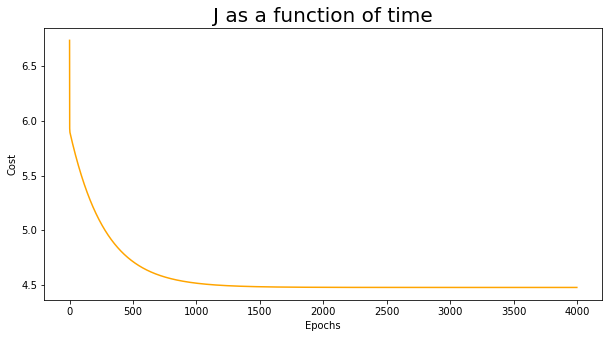

In [8]:
# Your code
x_base = range(len(historial_coste))
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(10,5))
plt.plot(x_base, historial_coste,color='Orange')
plt.title(r'J as a function of time', fontsize=20, fontfamily="sans-serif" )
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(color='white', linestyle='dotted', linewidth=0.5)
plt.show()

### Plot in 3D $J(\theta_0, \theta_1)$

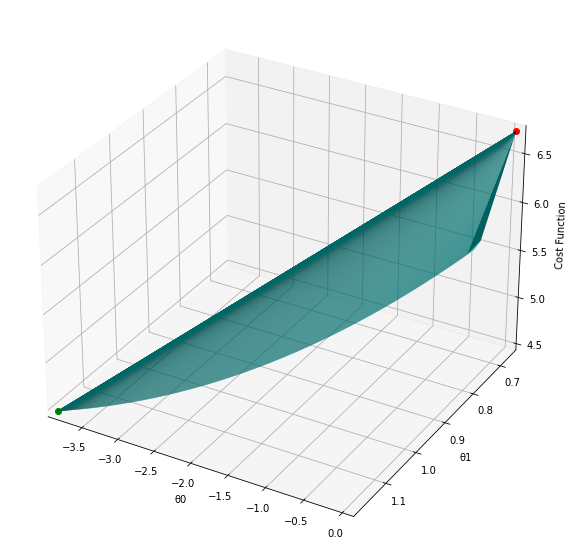

In [9]:
# Your code
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

X = np.array(thetas_0)
Y = np.array(thetas_1)
Z = np.array(historial_coste)

# Plot the 3d surface
surface =  ax.plot_trisurf(X, Y, Z, color = 'cyan')
plt.plot(theta_0,theta_1,Z.min(), marker="o", color="green") # Best parameters found
plt.plot(X[0],Y[0],Z.max(), marker="o", color="red")  # Initial parameters
plt.xlim(X.min() , X.max()) 
plt.ylim(Y.max() , Y.min())
plt.grid(color='white', linestyle='dotted', linewidth=0.5)
# Set some labels
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('Cost Function')
plt.show()